In [60]:
import pandas as pd

Using pandas to clean the natural gas data

In [61]:
file_path = '../raw_data/10yr_gas_data.csv'
# read in csv
df = pd.read_csv(file_path)

In [62]:
dates = []
states = []
values = []

# loop through columns of columns (DC is included so there are 51 state columns)
for i in range(1,52):

   #loop through rows
    for j in range(0,132): 
        date = df.iloc[j,0] # gets date from first column
        dates.append(date)  # adds date to dates list

        state_str = df.columns[i] # gets column title
        state_str = state_str.split(' Natural', 1) #splits the title at the first occurence of the word 'natural'
        state = state_str[0] # saves the state name 
        states.append(state) # adds the state to the states list

        value = df.iloc[j,i] # retrieves the value from the current row,value pair
        values.append(value) # adds the value to the values list 
       



In [63]:
df_clean = pd.DataFrame({
    'Date': dates,
    'State': states,
    'Natural Gas Consumption (MMcf)':values
})

df_clean

,Date,State,Natural Gas Consumption (MMcf)
0,Jan-2010,Alabama,9202.647
1,Feb-2010,Alabama,7762.261
2,Mar-2010,Alabama,6612.051
3,Apr-2010,Alabama,2987.217
4,May-2010,Alabama,1142.784
...,...,...,...
6727,Aug-2020,Wyoming,199.347
6728,Sep-2020,Wyoming,289.642
6729,Oct-2020,Wyoming,567.622
6730,Nov-2020,Wyoming,1532.600


In [64]:
output_path = 'clean_data/natural_gas_data.csv'

df_clean.to_csv(output_path)

Cleaning temperature data

In [65]:
file_path = 'all_states_ave_temp.csv'
# read in csv 
df2 = pd.read_csv(file_path)


In [66]:
df2.head()

,Alabama,Unnamed: 1,Average Temperature,Unnamed: 3
0,Units: Degrees Fahrenheit,NaN,NaN,NaN
1,Base Period: 2010-2020,NaN,NaN,NaN
2,Missing: -99,NaN,NaN,NaN
3,Date,NaN,Value,Anomaly
4,200001,Alabama,46.5,1.6


In [67]:
# drop NaN values from the dataframe
df2.dropna(how='any', inplace=True)

In [68]:
# list of columns to rename
column_names = {
    'Unnamed: 1': 'State', 
    'Average Temperature': 'Avg Temp (F)',
    'Unnamed: 3': 'Anomaly',
    'Alabama' : 'Date'
    }
# renaming columns
df2.rename(columns=column_names, inplace=True)
#reseting index
df2.reset_index(drop=True, inplace=True)
df2.head()

,Date,State,Average Temperature,Anomaly
0,200001,Alabama,46.5,1.6
1,200002,Alabama,52.3,2.5
2,200003,Alabama,58.9,2.7
3,200004,Alabama,60.1,-3.8
4,200005,Alabama,74,2.4


In [69]:
output_path = 'clean_data/avg_temp_by_state.csv'
#output the clean data to csv file
df2.to_csv(output_path)

In [70]:
# file paths
gas_file = 'clean_data/natural_gas_data.csv'
weather_file = 'clean_data/avg_temp_by_state.csv'

# import the files 
weather_df = pd.read_csv(weather_file)
gas_df = pd.read_csv(gas_file)

In [73]:
# droping the extra column that gets added
gas_df.drop(columns='Unnamed: 0', inplace=True)
weather_df.drop(columns='Unnamed: 0', inplace=True)


In [75]:
# drop dates before 2010
weather_df.drop(weather_df.loc[weather_df['Date'] < 201000].index, inplace=True)
weather_df.drop(weather_df.loc[weather_df['Date'] >= 202000].index, inplace=True)

In [88]:
# drop 2020 (since its not in the weather data) as well as DC (for the same reason)
# hawaii also had to be dropped from gas, as the data was not available via noaa
gas_df.drop(gas_df.loc[gas_df['Date'].str.contains("2020")].index, inplace=True)
gas_df.drop(gas_df.loc[gas_df['State']=='District of Columbia'].index, inplace=True)
gas_df.drop(gas_df.loc[gas_df['State']=='Hawaii'].index, inplace=True)
len(gas_df)

5880

In [91]:
out_path_weath = 'output_data/avg_temp_by_state.csv'
out_path_gas = 'output_data/natural_gas_data.csv'


In [ ]:
# formatted_df = df["Date"].dt.strftime("%m/%d/%y")

weather_df['Date'] = pd.to_datetime(weather_df['Date'], format='%Y%m')

weather_df['Date'] = weather_df['Date'].apply(lambda x: x.strftime('%Y-%m'))

In [113]:
gas_df['Date'] = pd.to_datetime(gas_df['Date'], format='%b-%Y')
gas_df['Date'] = gas_df['Date'].apply(lambda x: x.strftime('%Y-%m'))

In [114]:
gas_df.head()

,Date,State,Natural Gas Consumption (MMcf)
0,2010-01,Alabama,9202.647
1,2010-02,Alabama,7762.261
2,2010-03,Alabama,6612.051
3,2010-04,Alabama,2987.217
4,2010-05,Alabama,1142.784


In [115]:
combined_df = pd.merge(gas_df, weather_df, how='outer')

In [120]:
combined_df.head()

,Date,State,Natural Gas Consumption (MMcf),Average Temperature,Anomaly
0,2010-01,Alabama,9202.647,40.0,-4.9
1,2010-02,Alabama,7762.261,40.6,-9.2
2,2010-03,Alabama,6612.051,51.2,-5.0
3,2010-04,Alabama,2987.217,64.2,0.3
4,2010-05,Alabama,1142.784,73.3,1.7


In [117]:
len(combined_df)

5880

In [133]:
state_df = combined_df.groupby('State').mean()

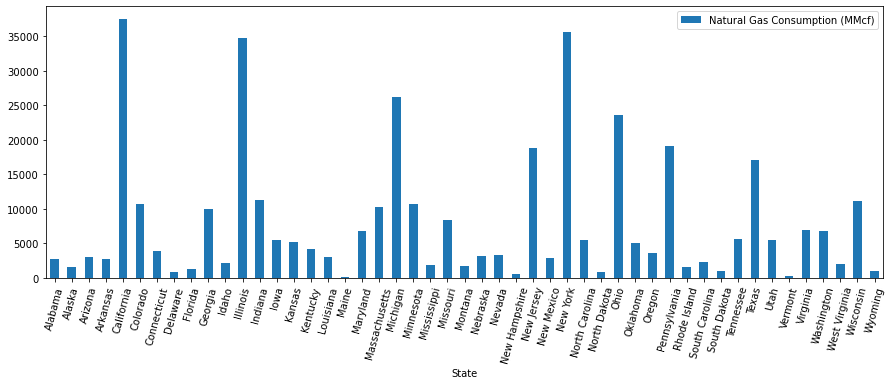

In [150]:
states_df.plot(kind='bar', y='Natural Gas Consumption (MMcf)', rot=75, figsize=(15, 5))

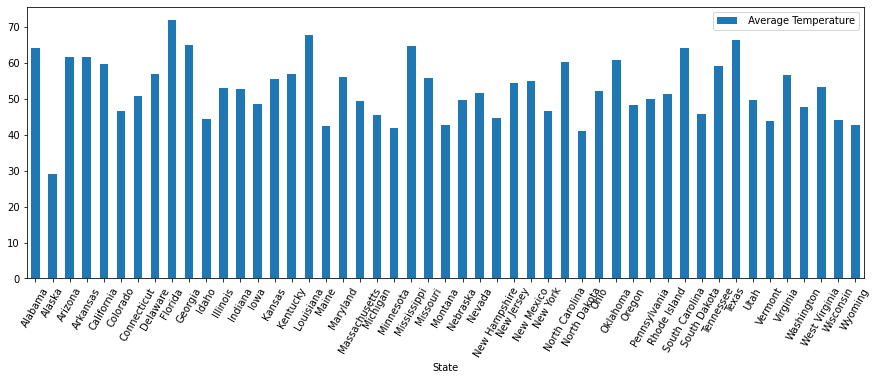

In [147]:
states_df.plot(kind='bar', y=' Average Temperature', rot=60, figsize=(15, 5))

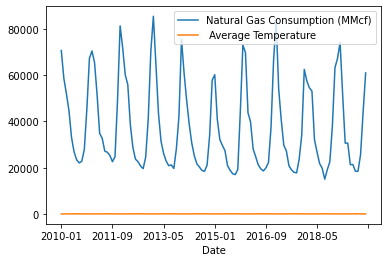

In [154]:
cali_data = combined_df.loc[combined_df['State'] == 'California']

cali_data.plot(kind="line", x='Date', y=['Natural Gas Consumption (MMcf)', ' Average Temperature'])

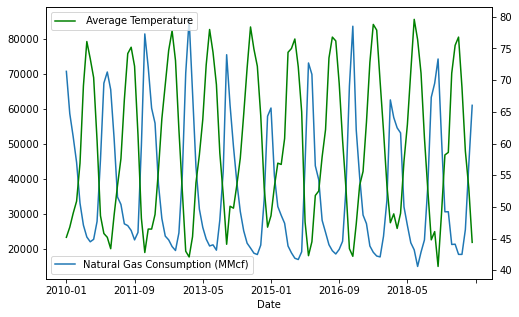

In [172]:
# ax1 = df1.plot()

# ax2 = ax1.twinx()
# ax2.spines['right'].set_position(('axes', 1.0))
# df2.plot(ax=ax2)

ax1 = cali_data.plot(kind='line', x='Date', y='Natural Gas Consumption (MMcf)')
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
cali_data.plot(ax=ax2, x= 'Date', y= ' Average Temperature', color='green', figsize=(8,5))